✅ Dataset loaded successfully!
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             5

C:\Users\comp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\comp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\comp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\comp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

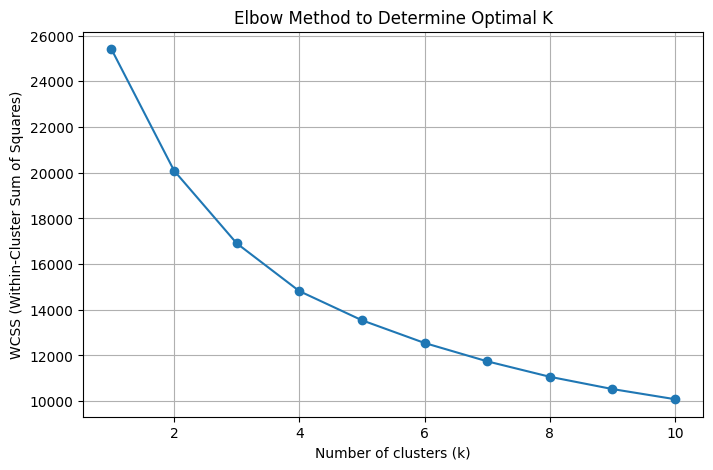

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Step 2: Load dataset
df = pd.read_csv(r"C:\Users\comp\Desktop\kuki\vs code\lab3\lab-3\ML\4thKmeans\sales_data_sample.csv", encoding='latin1')
print("✅ Dataset loaded successfully!")
print(df.head())

# Step 3: Data cleaning
# Drop columns with too many missing or irrelevant data (text, IDs, etc.)
# Keep only numeric columns for clustering
df_numeric = df.select_dtypes(include=[np.number])
df_numeric = df_numeric.dropna()

print("\nNumeric columns selected for clustering:")
print(df_numeric.columns)

# Step 4: Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Step 5: Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Step 6: Plot the Elbow Method graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()


C:\Users\comp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster Centers (scaled values):
 [[ 0.80575256  0.15427129  0.15853912 -0.09904797  0.13718852 -1.15312495
  -1.15590439  1.18162177  0.07017959]
 [-0.26380266  0.03950733  0.70579807  0.01510919  0.53506418  0.50914456
   0.50626827 -0.44498338  0.62400764]
 [-0.30832653 -0.17656987 -1.05002961  0.0605155  -0.80979834  0.26939922
   0.2754067  -0.37626384 -0.87164775]]

Cluster Counts:
 Cluster
1    1183
2     906
0     734
Name: count, dtype: int64


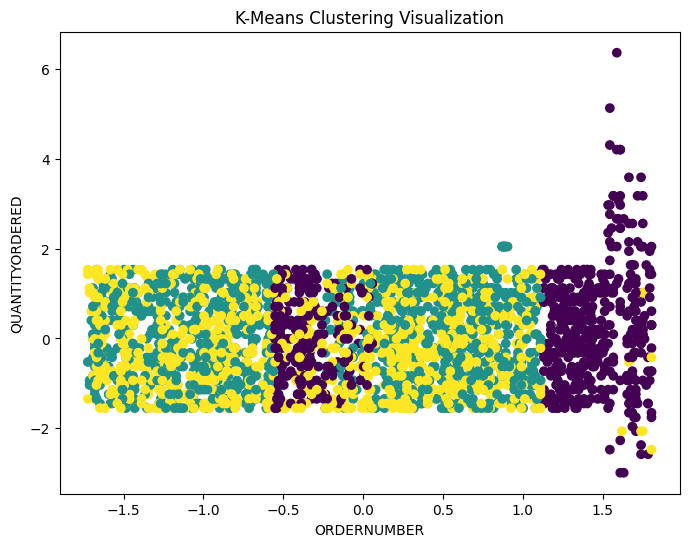

In [2]:
# Let's say we found 3 clusters from the elbow plot
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df_numeric['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 8: Analyze clusters
print("\nCluster Centers (scaled values):\n", kmeans.cluster_centers_)
print("\nCluster Counts:\n", df_numeric['Cluster'].value_counts())

# Step 9: Visualize clusters (using first 2 features)
plt.figure(figsize=(8,6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df_numeric['Cluster'], cmap='viridis')
plt.title("K-Means Clustering Visualization")
plt.xlabel(df_numeric.columns[0])
plt.ylabel(df_numeric.columns[1])
plt.show()


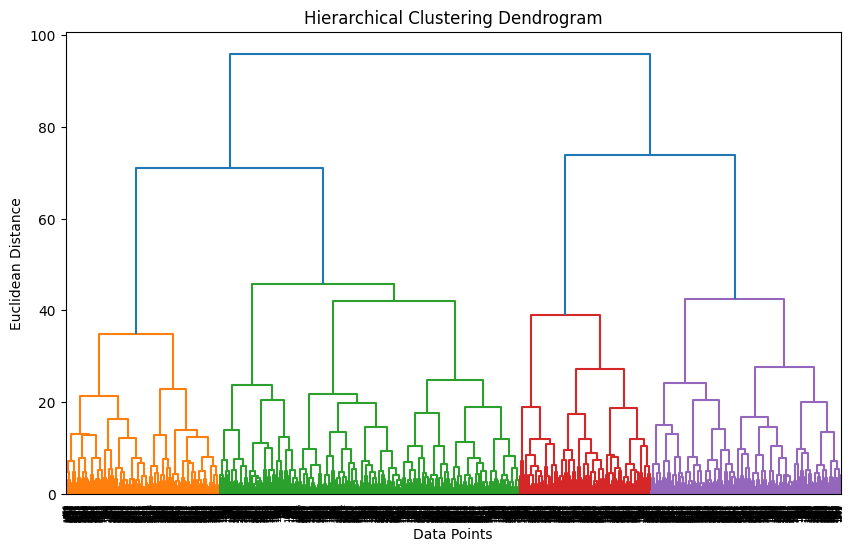


Hierarchical Cluster Counts:
 HCluster
1    1655
3     690
2     478
Name: count, dtype: int64


In [3]:
# Step 10: Hierarchical Clustering (Optional)
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Choose number of clusters (for example 3)
clusters = fcluster(linked, 3, criterion='maxclust')
df_numeric['HCluster'] = clusters



In [4]:
print("\nHierarchical Cluster Counts:\n", df_numeric['HCluster'].value_counts())


Hierarchical Cluster Counts:
 HCluster
1    1655
3     690
2     478
Name: count, dtype: int64
